#  Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Occupations
<br>Step 1. Import the necessary libraries
<br>Step 2. Import the dataset from "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user". 
<br>Step 3. Assign it to a variable called users
<br>Step 4. Discover what is the mean age per occupation
<br>Step 5. Discover the Male ratio per occupation and sort it from the most to the least
<br>Step 6. For each occupation, calculate the minimum and maximum ages
<br>Step 7. For each combination of occupation and sex, calculate the mean age 
<br>Step 8. For each occupation present the percentage of women and men

In [1]:
#Step 1
import pandas as pd

In [2]:
#Step 2
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

#Step 3
users = pd.read_csv(url, sep='|', index_col='user_id')

In [3]:
#Step 4
mean_age_per_occupation = users.groupby('occupation')['age'].mean()

print("Mean age per occupation:\n")
print( mean_age_per_occupation.to_string())

Mean age per occupation:

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111


In [4]:
#Step 5

def male_ratio(x):
    if 'M' in x['gender'].values:
        return x['gender'].value_counts(normalize=True)['M']
    else:
        return 0

male_ratio_per_occupation = users.groupby('occupation').apply(male_ratio)
male_ratio_per_occupation = male_ratio_per_occupation.sort_values(ascending=False)

print("Male ratio per occupation:\n")
print(male_ratio_per_occupation.to_string())

Male ratio per occupation:

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857


In [5]:
#Step 6
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(Minimum_Age='min', Maximum_Age='max')

print("Minimum and Maximum age per Occupation\n")
print(min_max_age_per_occupation)


Minimum and Maximum age per Occupation

               Minimum_Age  Maximum_Age
occupation                             
administrator           21           70
artist                  19           48
doctor                  28           64
educator                23           63
engineer                22           70
entertainment           15           50
executive               22           69
healthcare              22           62
homemaker               20           50
lawyer                  21           53
librarian               23           69
marketing               24           55
none                    11           55
other                   13           64
programmer              20           63
retired                 51           73
salesman                18           66
scientist               23           55
student                  7           42
technician              21           55
writer                  18           60


In [6]:
#Step 7
mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean().unstack()
mean_age_per_occupation_sex.columns.name = None
mean_age_per_occupation_sex.columns = ['Female', 'Male']

print("For each combination of occupation and sex, calculate the mean age\n")
print(mean_age_per_occupation_sex)


For each combination of occupation and sex, calculate the mean age

                  Female       Male
occupation                         
administrator  40.638889  37.162791
artist         30.307692  32.333333
doctor               NaN  43.571429
educator       39.115385  43.101449
engineer       29.500000  36.600000
entertainment  31.000000  29.000000
executive      44.000000  38.172414
healthcare     39.818182  45.400000
homemaker      34.166667  23.000000
lawyer         39.500000  36.200000
librarian      40.000000  40.000000
marketing      37.200000  37.875000
none           36.500000  18.600000
other          35.472222  34.028986
programmer     32.166667  33.216667
retired        70.000000  62.538462
salesman       27.000000  38.555556
scientist      28.333333  36.321429
student        20.750000  22.669118
technician     38.000000  32.961538
writer         37.631579  35.346154


In [7]:
#Step 8

gender_count_per_occupation = users.groupby(['occupation', 'gender']).size().unstack()
gender_count_per_occupation.columns.name = None
gender_count_per_occupation.columns = ['Women', 'Men'] # I just Changed column name F to Womene and M to Men

percentage_per_occupation = gender_count_per_occupation.div(gender_count_per_occupation.sum(axis=1), axis=0) * 100

print("Percentage of Women and Men for each Occupation\n")
print(percentage_per_occupation)


Percentage of Women and Men for each Occupation

                   Women         Men
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor               NaN  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


## Question 2 

Euro Teams
<br>Step 1. Import the necessary libraries
<br>Step 2. Import the dataset from https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv
<br>Step 3. Assign it to a variable called euro12 
<br>Step 4. Select only the Goal column
<br>Step 5. How many team participated in the Euro2012? 
<br>Step 6. What is the number of columns in the dataset?
<br>Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
<br>Step 8. Sort the teams by Red Cards, then to Yellow Cards 
<br>Step 9. Calculate the mean Yellow Cards given per Team
<br>Step 10. Filter teams that scored more than 6 goals
<br>Step 11. Select the teams that start with G
<br>Step 12. Select the first 7 columns
<br>Step 13. Select all columns except the last 3
<br>Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [8]:
import pandas as pd

In [9]:
#Step 2
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

In [10]:
#Step 3
euro12 = pd.read_csv(url)

In [11]:
#Step 4
goals = euro12['Goals']
print("Goal Column")
print(goals.to_string(index=False))

Goal Column
 4
 4
 4
 5
 3
10
 5
 6
 2
 2
 6
 1
 5
12
 5
 2


In [12]:
#Step 5

print("How many teams participated in the Euro2012?")
print("Ans:",euro12['Team'].nunique())

How many teams participated in the Euro2012?
Ans: 16


In [13]:
#Step 6
print("What is the number of columns in the dataset?")
print("Ans:",euro12.shape[1])

What is the number of columns in the dataset?
Ans: 35


In [14]:
#Step 7
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']] 

print(discipline.to_string(index=False)) # .to_string(index=False) this is to get rid of indexing

               Team  Yellow Cards  Red Cards
            Croatia             9          0
     Czech Republic             7          0
            Denmark             4          0
            England             5          0
             France             6          0
            Germany             4          0
             Greece             9          1
              Italy            16          0
        Netherlands             5          0
             Poland             7          1
           Portugal            12          0
Republic of Ireland             6          1
             Russia             6          0
              Spain            11          0
             Sweden             7          0
            Ukraine             5          0


In [15]:
# Step 8
sorted_byCards = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

print(sorted_byCards.to_string(index=False))


               Team  Yellow Cards  Red Cards
             Greece             9          1
             Poland             7          1
Republic of Ireland             6          1
              Italy            16          0
           Portugal            12          0
              Spain            11          0
            Croatia             9          0
     Czech Republic             7          0
             Sweden             7          0
             France             6          0
             Russia             6          0
            England             5          0
        Netherlands             5          0
            Ukraine             5          0
            Denmark             4          0
            Germany             4          0


In [16]:
#Step 9

print("Mean yellow cards per team:",discipline['Yellow Cards'].mean())


Mean yellow cards per team: 7.4375


In [17]:
#Step 10:

print("Teams with more than 6 goals are:", ', '.join(euro12.loc[euro12['Goals'] > 6, 'Team']))


Teams with more than 6 goals are: Germany, Spain


In [18]:
print("Teams starting with G are:", ', ' .join(euro12.loc[euro12['Team'].str.startswith('G'), 'Team']))


Teams starting with G are: Germany, Greece


In [19]:
print("First 7 Columns are \n\n", euro12.iloc[:, :7].to_string(index=False))


First 7 Columns are 

                Team  Goals  Shots on target  Shots off target Shooting Accuracy % Goals-to-shots  Total shots (inc. Blocked)
            Croatia      4               13                12             51.9%            16.0%                          32
     Czech Republic      4               13                18             41.9%            12.9%                          39
            Denmark      4               10                10             50.0%            20.0%                          27
            England      5               11                18             50.0%            17.2%                          40
             France      3               22                24             37.9%             6.5%                          65
            Germany     10               32                32             47.8%            15.6%                          80
             Greece      5                8                18             30.7%            19.2%      

In [20]:
# Step 13
pd.set_option('display.max_columns', None)  # It only showed 19 columns without this and inserted .... for others
pd.set_option('display.width', 130)  # this is to adjust the display width, without this the output looked topsy-turvy


print("All Columns except last 3 are \n\n", euro12.iloc[:, :-3]) # here first column is indexing column which I didnt remove because on removing this the data doesnt appear to be readable


All Columns except last 3 are 

                    Team  Goals  Shots on target  Shots off target Shooting Accuracy % Goals-to-shots  \
0               Croatia      4               13                12             51.9%            16.0%   
1        Czech Republic      4               13                18             41.9%            12.9%   
2               Denmark      4               10                10             50.0%            20.0%   
3               England      5               11                18             50.0%            17.2%   
4                France      3               22                24             37.9%             6.5%   
5               Germany     10               32                32             47.8%            15.6%   
6                Greece      5                8                18             30.7%            19.2%   
7                 Italy      6               34                45             43.0%             7.5%   
8           Netherlands      2 

In [21]:
print("Shooting Accuracy of England, Italy and England:\n\n", euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']].to_string(index=False))


Shooting Accuracy of England, Italy and England:

    Team Shooting Accuracy
England             50.0%
  Italy             43.0%
 Russia             22.5%


## Question 3

Housing

Step 1. Import the necessary libraries
<br>Step 2. Create 3 differents Series, each of length 100, as follows:
<br>• The first a random number from 1 to 4
<br>• The second a random number from 1 to 3
<br>• The third a random number from 10,000 to 30,000
<br>Step 3. Create a DataFrame by joinning the Series by column
<br>Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
<br>Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
<br>Step 6. Ops it seems it is going only until index 99. Is it true?
<br>Step 7. Reindex the DataFrame so it goes from 0 to 299

In [22]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

In [23]:
# Step 2: Create 3 different Series
first_series = pd.Series(np.random.randint(1, 5, size=100))
second_series = pd.Series(np.random.randint(1, 4, size=100))
third_series = pd.Series(np.random.randint(10000, 30001, size=100))

In [24]:
# Step 3: Create a DataFrame by joining the Series by column
df = pd.concat([first_series, second_series, third_series], axis=1)

In [25]:
# Step 4: Change the name of the columns
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print(df.columns)


Index(['bedrs', 'bathrs', 'price_sqr_meter'], dtype='object')


In [26]:
# Step 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.DataFrame(pd.concat([first_series, second_series, third_series]))

In [27]:
# Step 6: Check if it is going only until index 99
print(bigcolumn.index.max())  # It should print 299 if it's going beyond index 99


99


In [28]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)
print(bigcolumn.index.max())

299


## Question 4
Wind Statistics
<br>The data have been modified to contain some missing values, identified by NaN.
<br>Using pandas should make this exercise easier, in particular for the bonus question.
<br>You should be able to perform all of these operations without using a for loop or other looping construct.
<br>The data in 'wind.data' has the following format:
<br>Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
<br>61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
<br>61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
<br>61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
<br>Step 1. Import the necessary libraries
<br>Step 2. Import the dataset from the attached file wind.txt
<br>Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
<br>Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
<br>Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
<br>Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
<br>Step 7. Compute how many non-missing values there are in total.
<br>Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.
<br>Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.
<br>Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
<br>A different set of numbers for each day.
<br>Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
<br>Step 12. Downsample the record to a yearly frequency for each location. 
<br>Step 13. Downsample the record to a monthly frequency for each location. <br>Step 14. Downsample the record to a weekly frequency for each location.
<br>Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [29]:
# Step 1
import pandas as pd
import numpy as np
import datetime

In [30]:
# Step 2
data = pd.read_csv('wind.txt', delimiter='\s+', parse_dates={'date': ['Yr', 'Mo', 'Dy']}, date_format='%y %m %d')
print(data.head())

        date    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL    CLO    BEL    MAL
0 2061-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83  12.58  18.50  15.04
1 2061-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   9.67  17.54  13.83
2 2061-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   7.67  12.75  12.71
3 2061-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   5.88   5.46  10.88
4 2061-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92  10.34  12.92  11.83


In [31]:
# Step 3
data.set_index('date', inplace=True)


In [32]:
# Step 4 
def fix_year(year):
    if year > 2000:
        year -= 100
    return year

data.index = data.index.map(lambda x: x.replace(year=fix_year(x.year)))

print(data)

              RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL    CLO    BEL    MAL
date                                                                                          
1961-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83  12.58  18.50  15.04
1961-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   9.67  17.54  13.83
1961-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   7.67  12.75  12.71
1961-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   5.88   5.46  10.88
1961-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92  10.34  12.92  11.83
...           ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
1978-12-27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04  14.00  17.21  40.08
1978-12-28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25  15.25  18.05  21.79  41.46
1978-12-29  14.00  10.29  14.42   8.71   9.71  10.

In [33]:
# Step 5
data.index = pd.to_datetime(data.index)

In [34]:
# Step 6
missing_values = data.isnull().sum()
print("No. of Missing values for each location:\n")
print(missing_values.to_string())

No. of Missing values for each location:

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4


In [35]:
# Step 7
non_missing_values = data.notnull().sum().sum()
print("Total number of non missing values are:",non_missing_values)

Total number of non missing values are: 78857


In [36]:
# Step 8
mean_windspeed = data.mean().mean()
print("Mean Windspeed is:",mean_windspeed)

Mean Windspeed is: 10.227982360836938


In [37]:
# Step 9
loc_stats = data.describe().transpose()
print(loc_stats)

      count       mean       std   min    25%    50%    75%    max
RPT  6568.0  12.362987  5.618413  0.67   8.12  11.71  15.92  35.80
VAL  6571.0  10.644314  5.267356  0.21   6.67  10.17  14.04  33.37
ROS  6572.0  11.660526  5.008450  1.50   8.00  10.92  14.67  33.84
KIL  6569.0   6.306468  3.605811  0.00   3.58   5.75   8.42  28.46
SHA  6572.0  10.455834  4.936125  0.13   6.75   9.96  13.54  37.54
BIR  6574.0   7.092254  3.968683  0.00   4.00   6.83   9.67  26.16
DUB  6571.0   9.797343  4.977555  0.00   6.00   9.21  12.96  30.37
CLA  6572.0   8.495053  4.499449  0.00   5.09   8.08  11.42  31.08
MUL  6571.0   8.493590  4.166872  0.00   5.37   8.17  11.19  25.88
CLO  6573.0   8.707332  4.503954  0.04   5.33   8.29  11.63  28.21
BEL  6574.0  13.121007  5.835037  0.13   8.71  12.50  16.88  42.38
MAL  6570.0  15.599079  6.699794  0.67  10.71  15.00  19.83  42.54


In [38]:
# Step 10

pd.set_option('display.width', 40) # Adjusted the width so as there is only data of one location once. Tried to place 2 or more loction but it messes up the readability
day_stats = data.resample('D').agg(['min', 'max', 'mean', 'std'])
print(day_stats)

              RPT                    \
              min    max   mean std   
date                                  
1961-01-01  15.04  15.04  15.04 NaN   
1961-01-02  14.71  14.71  14.71 NaN   
1961-01-03  18.50  18.50  18.50 NaN   
1961-01-04  10.58  10.58  10.58 NaN   
1961-01-05  13.33  13.33  13.33 NaN   
...           ...    ...    ...  ..   
1978-12-27  17.58  17.58  17.58 NaN   
1978-12-28  13.21  13.21  13.21 NaN   
1978-12-29  14.00  14.00  14.00 NaN   
1978-12-30  18.50  18.50  18.50 NaN   
1978-12-31  20.33  20.33  20.33 NaN   

              VAL                    \
              min    max   mean std   
date                                  
1961-01-01  14.96  14.96  14.96 NaN   
1961-01-02    NaN    NaN    NaN NaN   
1961-01-03  16.88  16.88  16.88 NaN   
1961-01-04   6.63   6.63   6.63 NaN   
1961-01-05  13.25  13.25  13.25 NaN   
...           ...    ...    ...  ..   
1978-12-27  16.96  16.96  16.96 NaN   
1978-12-28   5.46   5.46   5.46 NaN   
1978-12-29  10.29  10.29

In [39]:
# Step 11

jan_avg_windspeed = data[data.index.month == 1].mean()
print("Average Windspeed  in January for each location\n")
print(jan_avg_windspeed.to_string())

Average Windspeed  in January for each location

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763


In [40]:
# Step 12 - Downsample the record to a yearly frequency for each location.
year_data = data.resample('A').mean()
print(year_data)


                  RPT        VAL  \
date                               
1961-12-31  12.299583  10.351796   
1962-12-31  12.246923  10.110438   
1963-12-31  12.813452  10.836986   
1964-12-31  12.363661  10.920164   
1965-12-31  12.451370  11.075534   
1966-12-31  13.461973  11.557205   
1967-12-31  12.737151  10.990986   
1968-12-31  11.835628  10.468197   
1969-12-31  11.166356   9.723699   
1970-12-31  12.600329  10.726932   
1971-12-31  11.273123   9.095178   
1972-12-31  12.463962  10.561311   
1973-12-31  11.828466  10.680493   
1974-12-31  13.643096  11.811781   
1975-12-31  12.008575  10.293836   
1976-12-31  11.737842  10.203115   
1977-12-31  13.099616  11.144493   
1978-12-31  12.504356  11.044274   

                  ROS       KIL  \
date                              
1961-12-31  11.362369  6.958227   
1962-12-31  11.732712  6.960440   
1963-12-31  12.541151  7.330055   
1964-12-31  12.104372  6.787787   
1965-12-31  11.848767  6.858466   
1966-12-31  12.020630  7.345726   

In [41]:
#Step 13- Downsample the record to a monthly frequency for each location.
monthly_data = data.resample('M').mean()
print(monthly_data)

                  RPT        VAL  \
date                               
1961-01-31  14.841333  11.988333   
1961-02-28  16.269286  14.975357   
1961-03-31  10.890000  11.296452   
1961-04-30  10.722667   9.427667   
1961-05-31   9.860968   8.850000   
...               ...        ...   
1978-08-31   9.645161   8.259355   
1978-09-30  10.913667  10.895000   
1978-10-31   9.897742   8.670968   
1978-11-30  16.151667  14.802667   
1978-12-31  16.175484  13.748065   

                  ROS       KIL  \
date                              
1961-01-31  13.431613  7.736774   
1961-02-28  14.441481  9.230741   
1961-03-31  10.752903  7.284000   
1961-04-30   9.998000  5.830667   
1961-05-31  10.818065  5.905333   
...               ...       ...   
1978-08-31   9.032258  4.502903   
1978-09-30  10.635000  5.725000   
1978-10-31   9.295806  4.721290   
1978-11-30  13.508000  7.317333   
1978-12-31  15.635161  7.094839   

                  SHA        BIR  \
date                               
196

In [42]:
#Step 14
weekly_data = data.resample('W').mean()
print(weekly_data)

                  RPT        VAL  \
date                               
1961-01-01  15.040000  14.960000   
1961-01-08  13.541429  11.486667   
1961-01-15  12.468571   8.967143   
1961-01-22  13.204286   9.862857   
1961-01-29  19.880000  16.141429   
...               ...        ...   
1978-12-03  14.934286  11.232857   
1978-12-10  20.740000  19.190000   
1978-12-17  16.758571  14.692857   
1978-12-24  11.155714   8.008571   
1978-12-31  14.951429  11.801429   

                  ROS        KIL  \
date                               
1961-01-01  13.170000   9.290000   
1961-01-08  10.487143   6.417143   
1961-01-15  11.958571   4.630000   
1961-01-22  12.982857   6.328571   
1961-01-29  18.225714  12.720000   
...               ...        ...   
1978-12-03  13.941429   5.565714   
1978-12-10  17.034286   9.777143   
1978-12-17  14.987143   6.917143   
1978-12-24  13.172857   4.004286   
1978-12-31  16.035714   6.507143   

                  SHA        BIR  \
date                      

In [43]:
#Step 15
weekly_stats = weekly_data.iloc[:52]
weekly_stats = pd.DataFrame()
weekly_stats['min'] = weekly_data.min(axis=1)
weekly_stats['max'] = weekly_data.max(axis=1)
weekly_stats['mean'] = weekly_data.mean(axis=1)
weekly_stats['std'] = weekly_data.std(axis=1)
print(weekly_stats)

                  min        max  \
date                               
1961-01-01   9.290000  18.500000   
1961-01-08   6.417143  13.541429   
1961-01-15   4.630000  12.468571   
1961-01-22   6.328571  13.204286   
1961-01-29  12.720000  22.530000   
...               ...        ...   
1978-12-03   5.565714  18.728571   
1978-12-10   9.777143  23.061429   
1978-12-17   6.917143  16.758571   
1978-12-24   4.004286  18.977143   
1978-12-31   6.507143  26.844286   

                 mean       std  
date                             
1961-01-01  13.018182  2.808875  
1961-01-08   9.847659  2.601705  
1961-01-15   8.353214  2.719649  
1961-01-22   9.368413  2.224531  
1961-01-29  16.958095  2.915635  
...               ...       ...  
1978-12-03  10.913333  3.557747  
1978-12-10  15.938333  3.843412  
1978-12-17  11.216786  3.474393  
1978-12-24   9.414167  3.909628  
1978-12-31  12.824405  5.152236  

[940 rows x 4 columns]


In [44]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

## Question 5
<br>Step 1. Import the necessary libraries
<br>Step 2. Import the dataset from this address. <br>Step 3. Assign it to a variable called chipo. Step 4. See the first 10 entries
<br>Step 5. What is the number of observations in the dataset? <br>Step 6. What is the number of columns in the dataset?
<br>Step 7. Print the name of all the columns. <br>Step 8. How is the dataset indexed?
<br>Step 9. Which was the most-ordered item?
<br>Step 10. For the most-ordered item, how many items were ordered?
<br>Step 11. What was the most ordered item in the choice_description column? <br>Step 12. How many items were orderd in total?
<br>Step 13.
<br>• Turn the item price into a float
<br>• Check the item price type
<br>• Create a lambda function and change the type of item price
<br>• Check the item price type
<br>Step 14. How much was the revenue for the period in the dataset? <br>Step 15. How many orders were made in the period?
<br>Step 16. What is the average revenue amount per order? <br>Step 17. How many different items are sold?

In [45]:
#Step 1
import pandas as pd

In [46]:
#Step 2
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [47]:
#Step 3
chipo = pd.read_csv(url, delimiter='\t')

In [48]:
#Step 4
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                                                                                   choice_description  \
0                                                                                                                 NaN   
1                                                    

In [49]:
#Step 5
print("Number of observations in the dataset:", len(chipo))

Number of observations in the dataset: 4622


In [50]:
#Step 6

print("Number of columns in the dataset:", chipo.shape[1])

Number of columns in the dataset: 5


In [51]:
#Step 7
print("Name of Columns are:",', '.join(chipo.columns))

Name of Columns are: order_id, quantity, item_name, choice_description, item_price


In [52]:
#Step 8
print("Index type:", chipo.index)

Index type: RangeIndex(start=0, stop=4622, step=1)


In [53]:
#Step 9
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("Most-ordered item is:", most_ordered_item)

Most-ordered item is: Chicken Bowl


In [54]:
#Step 10
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print(f"Number of items ordered for {most_ordered_item}: {most_ordered_item_count}")


Number of items ordered for Chicken Bowl: 761


In [55]:
#Step 11
most_ordered_item_choice = chipo['choice_description'].value_counts().idxmax()
print("Most-ordered item in choice description is:", most_ordered_item_choice)

Most-ordered item in choice description is: [Diet Coke]


In [56]:
#Step 12
print("Total items ordered:", chipo['quantity'].sum())

Total items ordered: 4972


In [57]:
#Step 13

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]) if isinstance(x, str) else x)

print("Item price type after conversion:", chipo['item_price'].dtype)

Item price type after conversion: float64


In [58]:
#Step 14
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue:", revenue)

Total revenue: 39237.02


In [59]:
#Step 15 
total_orders = chipo['order_id'].nunique()
print("Number of orders:", total_orders)

Number of orders: 1834


In [60]:
#Step 16
average_revenue_per_order = revenue / total_orders
print("Average revenue per order:", average_revenue_per_order)

Average revenue per order: 21.39423118865867


In [61]:
#Step 17
num_different_items = chipo['item_name'].nunique()
print("Number of different items sold:", num_different_items)

Number of different items sold: 50


## Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
file_path = 'us-marriages-divorces-1867-2014.csv'
df = pd.read_csv(file_path)

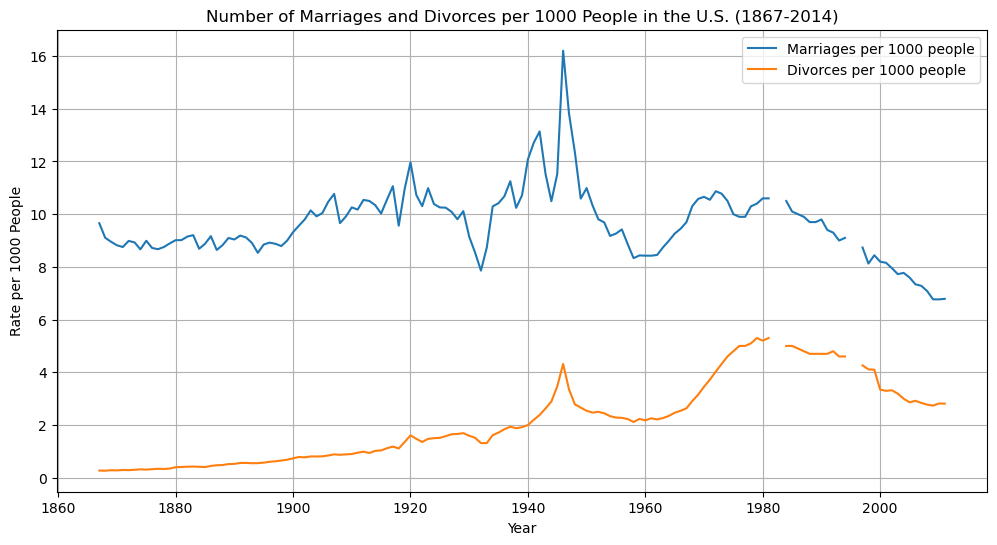

In [64]:
df['Marriages_Per_1000'] = df['Marriages'] / df['Population'] * 1000
df['Divorces_Per_1000'] = df['Divorces'] / df['Population'] * 1000

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(df['Year'], df['Marriages_Per_1000'], label='Marriages per 1000 people')
plt.plot(df['Year'], df['Divorces_Per_1000'], label='Divorces per 1000 people')

plt.title('Number of Marriages and Divorces per 1000 People in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Rate per 1000 People')
plt.legend()
plt.grid(True)
plt.show()

## Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

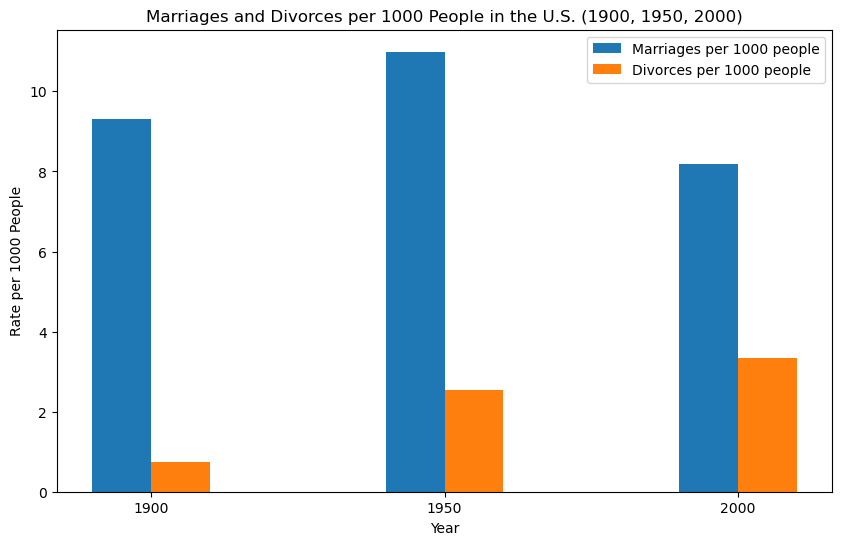

In [65]:
# Filter data for the specified years
selected_years = [1900, 1950, 2000]
selected_data = df[df['Year'].isin(selected_years)].copy()  

# Calculate marriages and divorces per capita for the selected years using loc
selected_data.loc[:, 'Marriages_Per_1000'] = selected_data['Marriages'] / selected_data['Population'] * 1000
selected_data.loc[:, 'Divorces_Per_1000'] = selected_data['Divorces'] / selected_data['Population'] * 1000

# Increase bar thickness
bar_width = 10

# Plotting
plt.figure(figsize=(10, 6))

bar_positions_marriages = selected_data['Year'] - bar_width / 2
bar_positions_divorces = selected_data['Year'] + bar_width / 2

plt.bar(bar_positions_marriages, selected_data['Marriages_Per_1000'], width=bar_width, label='Marriages per 1000 people')
plt.bar(bar_positions_divorces, selected_data['Divorces_Per_1000'], width=bar_width, label='Divorces per 1000 people')

plt.title('Marriages and Divorces per 1000 People in the U.S. (1900, 1950, 2000)')
plt.xlabel('Year')
plt.ylabel('Rate per 1000 People')
plt.legend()
plt.xticks(selected_data['Year'])
plt.show()


## Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

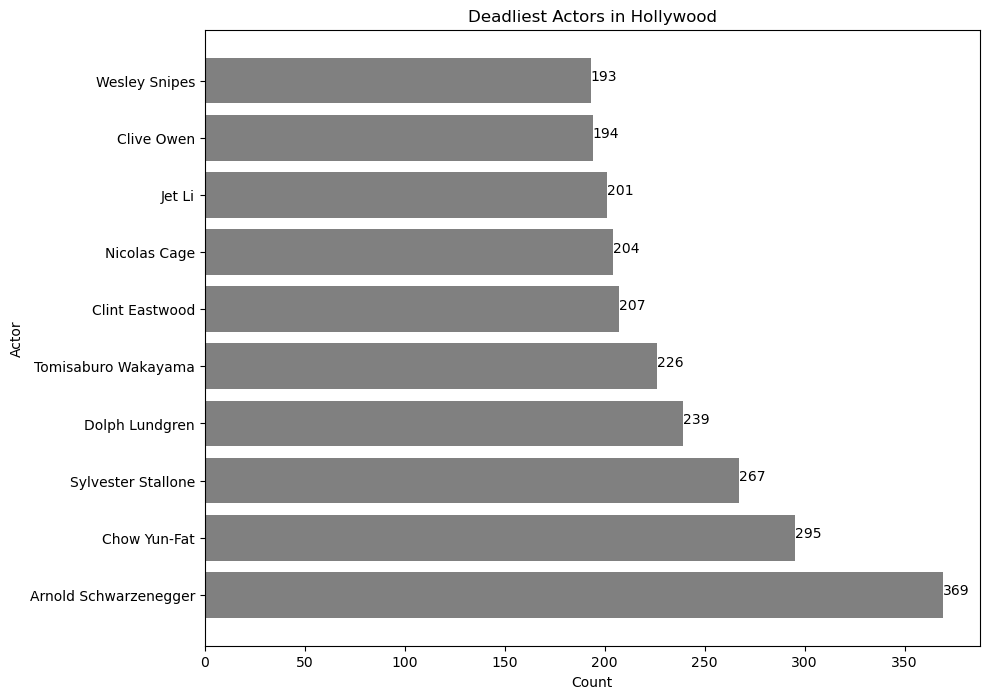

In [66]:
file_path = 'actor_kill_counts.csv'
actor_data = pd.read_csv(file_path)

# Sort the data by kill count in descending order
sorted_actor_data = actor_data.sort_values(by='Count', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))

plt.barh(sorted_actor_data['Actor'], sorted_actor_data['Count'], color='grey')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Adding labels to the bars
for index, value in enumerate(sorted_actor_data['Count']):
    plt.text(value, index, str(value))

plt.show()

## Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
<br>Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

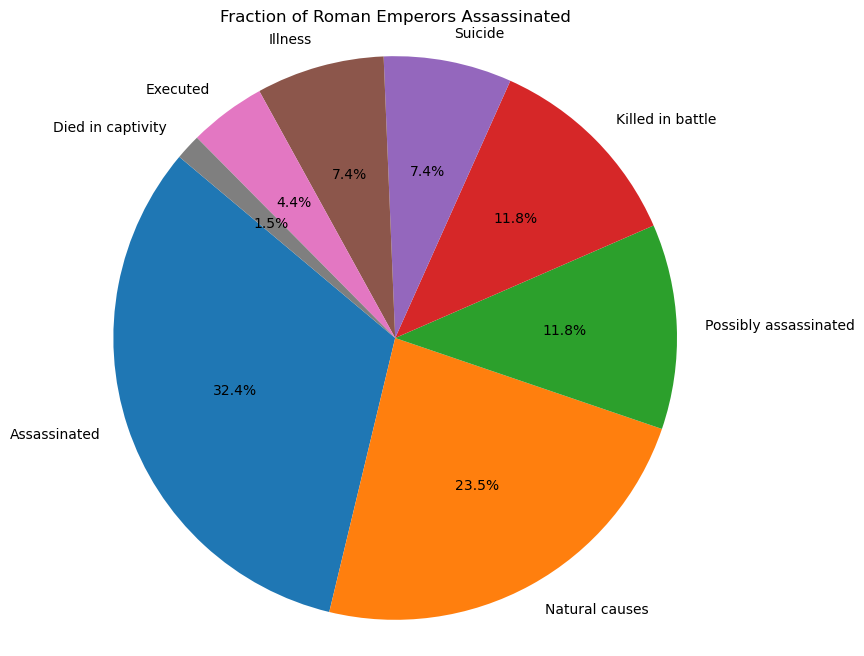

In [67]:
df = pd.read_csv('roman-emperor-reigns.csv')

# Count the occurrences of assassinations
assassination_counts = df['Cause_of_Death'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(assassination_counts, labels=assassination_counts.index, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Fraction of Roman Emperors Assassinated')

# Show the pie chart
plt.show()

## Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
<br>Don't forget to label your axes! Color each dot according to its year.

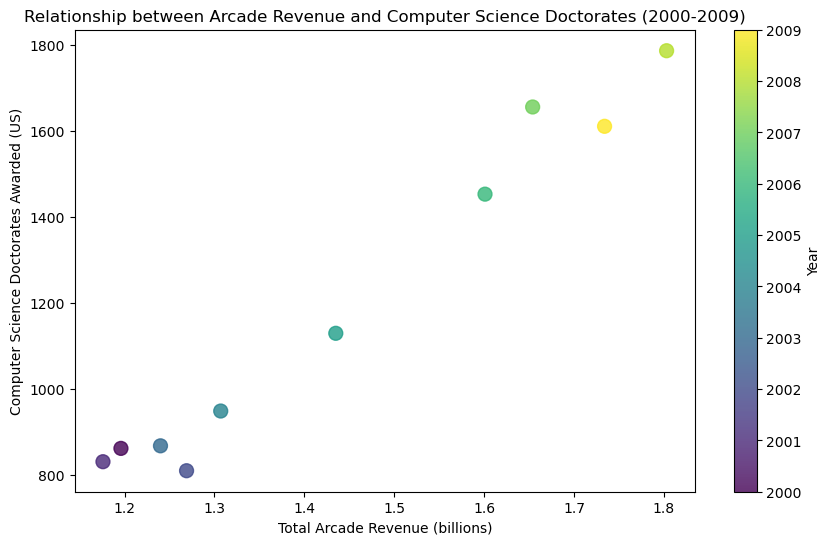

In [68]:
df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Total Arcade Revenue (billions)'], df['Computer Science Doctorates Awarded (US)'],
                      c=df['Year'], cmap='viridis', s=100, alpha=0.8)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Labeling axes and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and Computer Science Doctorates (2000-2009)')

# Show the plot
plt.show()